# Import Libraries 

In [1]:
import os
import json
import datetime
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
import itertools
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load comments file

In [2]:
file= "comments_and_reactions\comments.json"
data = json.load(open(file, 'r')) 

# Extract comments and years from comments file

In [3]:
comments=[]
timestamp=[]
for i in range(len(data["comments_v2"])):
    if 'data' in data["comments_v2"][i]:
        comments.append(data["comments_v2"][i]["data"][0]["comment"]["comment"])
        ts=datetime.datetime.fromtimestamp(data["comments_v2"][i]["data"][0]["comment"]["timestamp"])
        timestamp.append(ts.year)

# Store comments and years in DataFrame

In [4]:
df = pd.DataFrame(comments,columns =['comments'])
df['years']=timestamp
df

,comments,years
0,13 FHADA MAIS LA5OR 77 AMIS,2013
1,5,2013
2,Ù ÙØªØ¨Ø§ÙØ´,2013
3,hhhhhhhhhhhh mdr,2013
4,7asaan lah ira7moo :'(,2013
...,...,...
2094,Mourad Shaissah hhhhhhhhhhhh lala mafiash had ...,2022
2095,#Kaggle_playground,2022
2096,Congratulations ðð,2022
2097,Hhhhhhhhhh ikhan posting ðððððð,2022


# NLP preprocessing

In [5]:
def listToString(s): 
    str1 = " "  
    return (str1.join(s))

In [6]:
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

def clean_data(data):
    data=re.sub(r'http\S+','',data)
    data=re.sub('[^a-zA-Z]',' ',data)
    data=str(data).lower()
    data=word_tokenize(data)
    data= [item for item in data if item not in stop_words]
    data=[lemma.lemmatize(word=w,pos='v')for w in data]
    data= [i for i in data if len(i)>2 ]
    data = listToString(data)
    return data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yousra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yousra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yousra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Apply NLP preprocessing on the DataFrame

In [7]:
for i in range(len(df)):
    df['comments'][i]=clean_data(df['comments'][i])
df

,comments,years
0,fhada mais amis,2013
1,,2013
2,,2013
3,hhhhhhhhhhhh mdr,2013
4,asaan lah ira moo,2013
...,...,...
2094,mourad shaissah hhhhhhhhhhhh lala mafiash ayl,2022
2095,kaggle playground,2022
2096,congratulations,2022
2097,hhhhhhhhhh ikhan post,2022


# DataFrame preprocessing

In [8]:
# Check for duplicated data 
df.duplicated().sum()

488

In [9]:
df.drop_duplicates(keep=False, inplace=True)
df= df.reset_index(drop=True)

In [10]:
# Check for duplicated data
df.duplicated().sum()

0

In [11]:
# Check for null data 
df.isnull().sum()

comments    0
years       0
dtype: int64

# Display 50 frequent comments in each year

In [12]:
def wordcount_gen(df, category):
    # Combine all comments
    combined_comments = " ".join([news for news in df[df.years==category]['comments']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=20, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_comments))
    plt.title('{} Comments'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

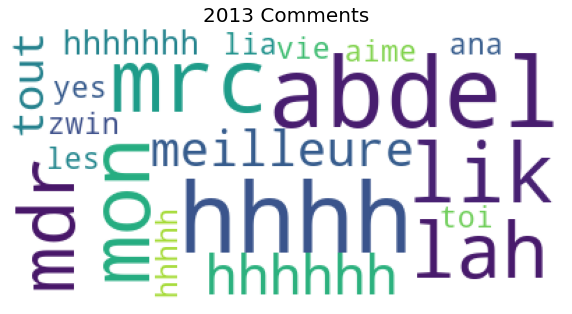

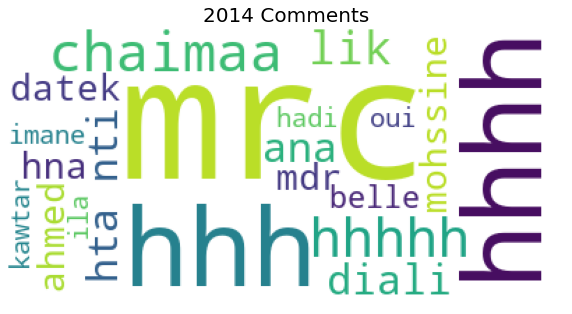

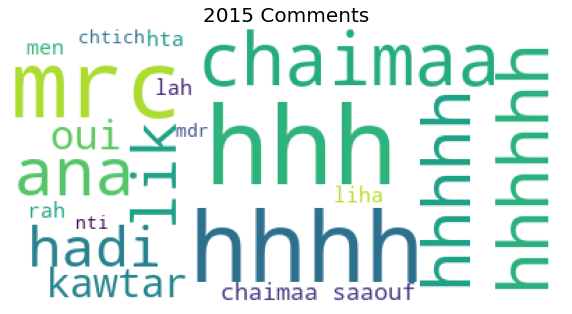

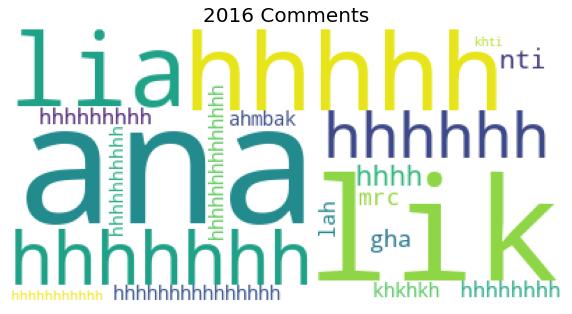

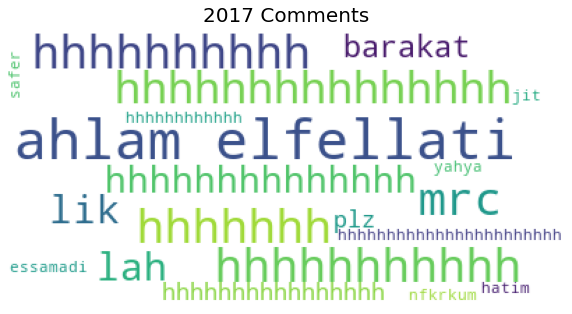

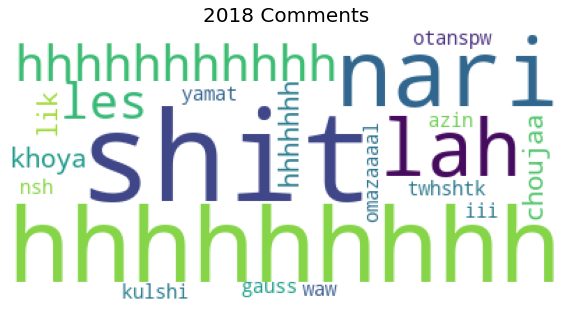

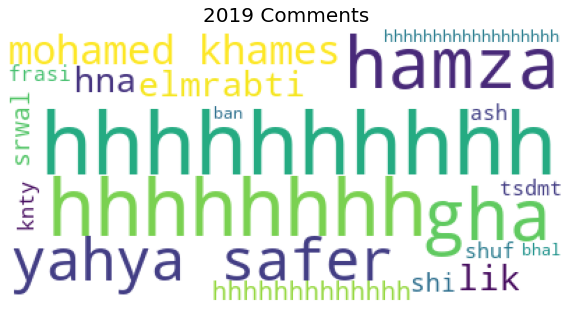

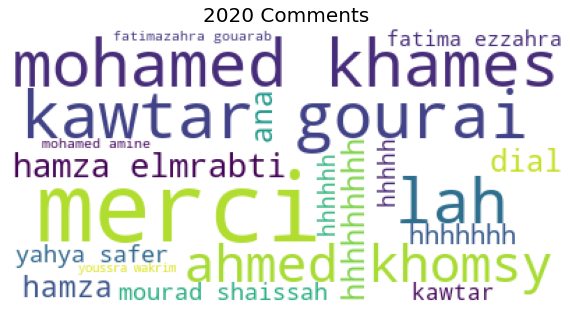

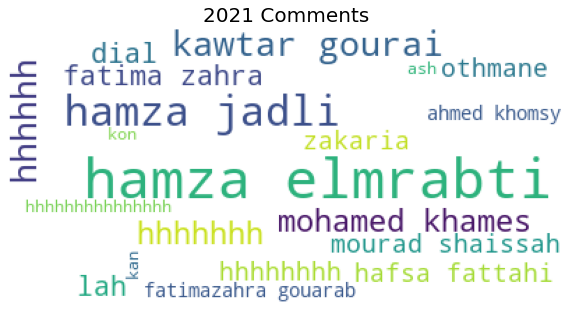

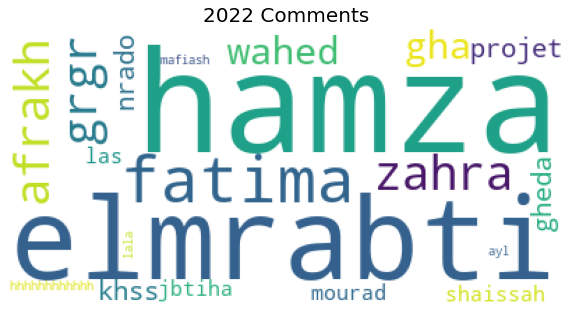

In [13]:
year=2013
for i in range(10):
    wordcount_gen(df, year +i)

# Collect words from comments

In [14]:
l=[]
for i in range(len(df)):
    l.append((word_tokenize(df['comments'][i])))

# Frenquency of words in comments

In [15]:
words_collection = Counter(list(itertools.chain.from_iterable(l)))

# Display 20 frenquent words in comments

In [16]:
freq_word_df = pd.DataFrame(words_collection.most_common(20))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,mrc,80
1,hamza,62
2,hhhh,57
3,lik,56
4,ana,54
5,hhhhhh,50
6,hhhhh,49
7,hhhhhhh,48
8,lah,45
9,kawtar,42


<AxesSubplot:title={'center':'Top 20 words'}, xlabel='frequently_used_word'>

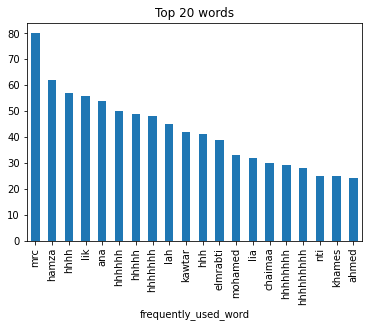

In [17]:
freq_word_df.groupby('frequently_used_word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 20 words')